# FIT5196 Task 4 in Assessment 2
#### Student Name: Zhiqing Shu
#### Student ID: 28217551

Date: 13/05/2018

Version: 2.0

Environment: Python  and Anaconda 

Libraries used:
* pandas 0.22.0 (for data frame, included in Anaconda Python 3.6)
* numpy 1.12.1 (for data format, included in Anaconda Python 3.6)
* seaborn 0.8.1 (for statistical data visualization, included in Anaconda Python 3.6)
* matplotlib 2.2.2 (for python 2D plotting, included in Anaconda Python 3.6)

## Introduction
In this task, you are required to identify the outliers and delete those rows with outliers by analyzing the dataset4 (dataset4_with_outliers.csv)

### 1. Import Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns  
import matplotlib.pyplot as plt

### 2. Load the data and store it in a Panda DataFrame

In [2]:
dataset4 = pd.read_csv('dataset4_with_outliers.csv')
dataset4.shape

(9996, 19)

In [3]:
dataset4.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
0,5437400630,20141016T000000,625000.0,4,2.25,1920,8259,2.0,0,0,4,8,1920,0,1979,0,98027,47.5616,-122.088
1,3999300290,20141016T000000,850000.0,3,3.50,2620,11148,2.0,0,4,4,9,2060,560,1977,0,98008,47.5845,-122.115
2,2525059134,20141016T000000,500000.0,2,1.50,1760,12000,1.0,0,0,4,7,1760,0,1964,0,98052,47.6288,-122.109
3,1862400285,20141016T000000,375000.0,3,1.00,1200,5404,1.0,0,0,3,6,1200,0,1937,0,98117,47.6969,-122.368
4,7199320190,20141016T000000,618000.0,4,2.25,2470,7350,1.0,0,0,3,7,1600,870,1978,0,98052,47.6936,-122.128


### 3. Finding the outliers

Our dataset is about house property. Normally, people will pay more attention to price od a house, so we start with finding the outliers in `price`.

Using `pandas.DataFrame.corr()` function to get the correlation between `price` and other attributes.

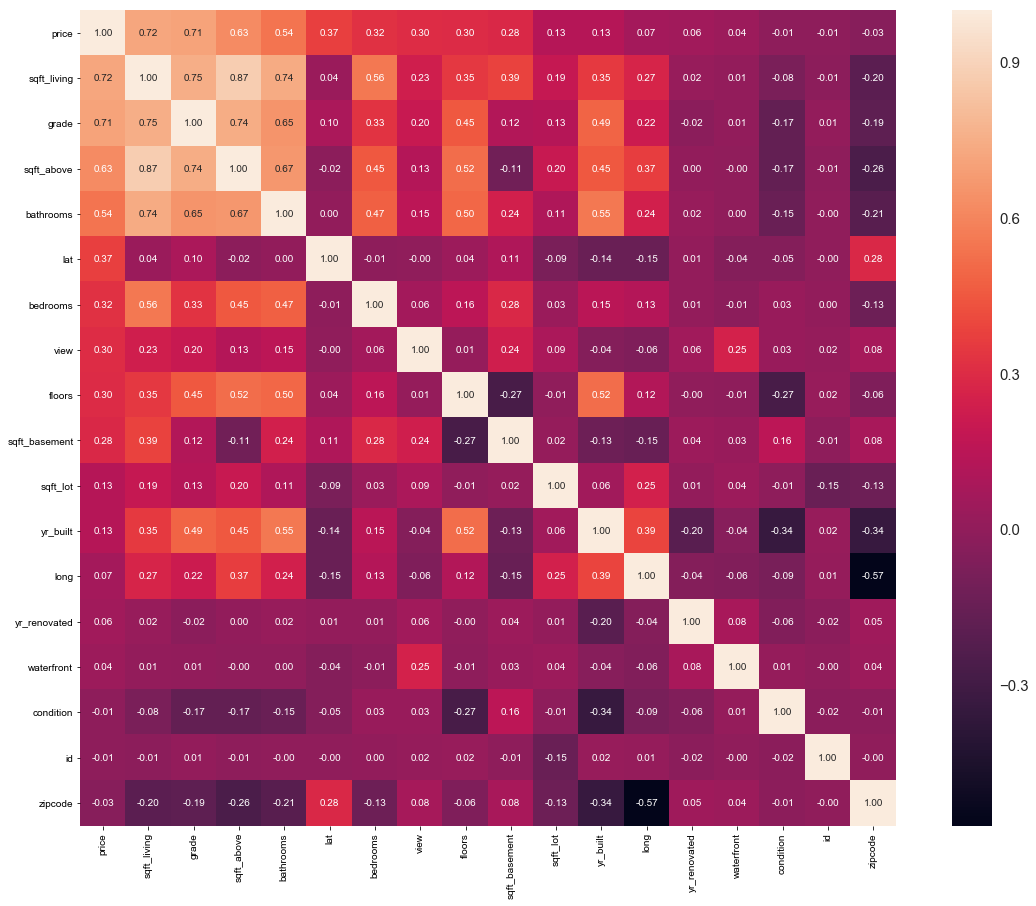

In [4]:
# Plot correlation heatmap
plt.subplots(figsize=(20,15))
corrmat = dataset4.corr()

#number of variables for heatmap
k = 19 
cols = corrmat.nlargest(k, 'price')['price'].index
cm = np.corrcoef(dataset4[cols].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, 
yticklabels=cols.values, xticklabels=cols.values)
plt.show()

From above figure, we can see that `price` has strong correlation with `sqft_living` and `grade`, so we plot these three attributes to see if there is any abnormal data.

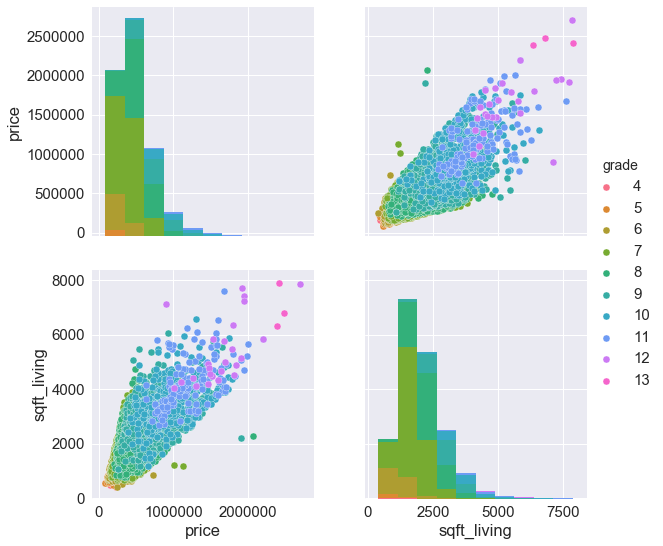

In [5]:
# cross compare using pair plot
sns.pairplot(dataset4, vars=["price", "sqft_living"],hue="grade",size = 4)  
plt.show() 

From above figures, we can see there indeed exist some abnormal point, for example, some house rated lower and with smaller area costs more than others. However, we can not say they must be the outlier, because if this house has far more land space, this situation will be reasonable.
As a result, we need to make further efforts to see if they are outlier.

I decide to group the house information by `grade`, since a house graded higher costs more than other house with same living space is make sence. 

In [6]:
#dataset4['price_per_sqft'] = dataset4.price / dataset4.sqft_living

In [7]:
# group dataset4 by 'grade'
groupby_grade = dataset4.groupby('grade')
groupby_grade

In [8]:
price_grade = groupby_grade.price.describe()
price_grade

,count,mean,std,min,25%,50%,75%,max
grade,,,,,,,,
4,12.0,1.869208e+05,51746.872801,90000.0,148250.0,202500.0,229287.5,2.480000e+05
5,107.0,2.339842e+05,70884.062221,89950.0,185450.0,225000.0,284000.0,4.250000e+05
6,965.0,2.967699e+05,100621.990862,118000.0,217000.0,275500.0,364000.0,7.306070e+05
7,4345.0,3.984489e+05,138672.806644,155000.0,289950.0,375000.0,480000.0,1.122948e+06
8,2807.0,5.237834e+05,173372.971175,205000.0,386250.0,505500.0,625500.0,2.066243e+06
9,1139.0,7.233687e+05,236174.261153,256950.0,555000.0,700000.0,856000.0,1.903987e+06
10,457.0,9.320359e+05,281875.149620,389000.0,740000.0,864000.0,1088000.0,1.789950e+06
11,136.0,1.214719e+06,316891.609983,633000.0,968750.0,1157500.0,1406250.0,2.200000e+06
12,25.0,1.638176e+06,383370.531621,900000.0,1465000.0,1637500.0,1835000.0,2.700000e+06


In [9]:
# price_grade = groupby_grade.price_per_sqft.describe()
# price_grade

I calculate the `price` and then group. Since I just need the $(Q_{1}$ and $(Q_{3}$ not the mean, the 'average of average' problem will not effect the result.

In statistics, $IQR = Q3 – Q1$, which can be used as a measure of how spread-out the values are, and if a data point is below $Q1 – 1.5×IQR$ or above $Q3 + 1.5×IQR$, it is viewed as being too far from the central values to be reasonable. So I checked if there is any record with `price` exceeding the range $(Q_{1}-1.5(Q_{3}-Q_{1}), Q_{3}+1.5(Q_{3}-Q_{1}))$ but graded same.

Create two mathod to get the `UpperFence` and `LowerFence` of `price`.

In [10]:
#Calculating upper bond of normal data
def getUpperFence_price(i):
    upper_fence = price_grade.loc[i]['75%'] + (price_grade.loc[i]['75%']-price_grade.loc[i]['25%'])*1.5
    return upper_fence

#Calculating lower bond of normal data
def getLowerFence_price(i):
    upper_fence = price_grade.loc[i]['25%'] - (price_grade.loc[i]['75%']-price_grade.loc[i]['25%'])*1.5
    return upper_fence

Create a dataframe to store records which is possible to be outlier.

In [11]:
error_df = pd.DataFrame(columns=dataset4.columns)

In [12]:
#Retrieve the dataframe may have outliers
for i in range(len(dataset4)):
    if dataset4.loc[i].price > getUpperFence_price(dataset4.loc[i].grade) \
    or dataset4.loc[i].price < getLowerFence_price(dataset4.loc[i].grade):
        error_df = error_df.append(dataset4.loc[i],ignore_index=False)

Check suspicious data graded `4`.

In [13]:
error_df[(error_df.grade == 4)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long


Check suspicious data graded `5`.

In [14]:
error_df[(error_df.grade == 5)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long


Check suspicious data graded `6`.

In [15]:
error_df[(error_df.grade == 6)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
8,7200179,20141016T000000,730607.043194,2,1.0,840,12750,1.0,0,0,3,6,840,0,1925,0,98055,47.4840,-122.211
69,3026079005,20141017T000000,640000.000000,6,2.0,2840,228690,1.5,0,0,3,6,2720,120,1948,0,98019,47.7158,-121.966
2651,8651400230,20141208T000000,642063.557247,3,2.0,1100,5200,1.0,0,0,3,6,1100,0,1969,2014,98042,47.3606,-122.083
5768,3886903155,20150304T000000,606000.000000,3,2.0,1980,7680,1.5,0,0,4,6,1070,910,1911,0,98033,47.6839,-122.195
8002,2629600016,20150410T000000,625500.000000,2,1.0,2160,7439,1.0,0,0,4,6,1300,860,1953,0,98115,47.6981,-122.286


House `69` has a very large land space, this may explain why it is that expensive. While others' space value is in normal range, so can be look as outliers.
Above house graded `6` are the outliers.

In [16]:
dataset4.drop([8,2651,5768,8002],inplace=True)

Check suspicious data graded `7`.

In [17]:
error_df[(error_df.grade == 7)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
5,8815400670,20141016T000000,7.800000e+05,3,2.00,2610,6000,1.0,0,0,5,7,1310,1300,1941,0,98115,47.6750,-122.289
121,9523103000,20141020T000000,7.800000e+05,3,1.75,2430,4524,1.5,0,0,4,7,1830,600,1924,0,98103,47.6740,-122.350
431,9294300515,20141024T000000,7.750000e+05,3,2.00,2010,7017,2.0,0,3,3,7,2010,0,1951,1988,98115,47.6828,-122.267
635,6908200021,20141028T000000,7.699500e+05,3,2.00,2190,5400,1.0,0,2,5,7,1260,930,1952,0,98107,47.6737,-122.400
734,1959703070,20141029T000000,9.797000e+05,5,3.00,3730,5500,1.5,0,0,3,7,2160,1570,1927,0,98102,47.6507,-122.320
1028,6127600036,20141105T000000,7.990000e+05,4,2.75,2390,6820,2.0,0,0,4,7,2140,250,1945,0,98115,47.6788,-122.270
1060,2473381070,20141105T000000,1.011233e+06,3,1.75,1210,7000,1.0,0,0,3,7,1210,0,1975,0,98058,47.4572,-122.169
1413,5101402428,20141112T000000,7.900000e+05,4,2.50,2560,12760,1.0,0,0,4,7,1760,800,1949,0,98115,47.6947,-122.303
1518,5430300120,20141113T000000,1.100000e+06,5,2.25,4320,7620,2.0,0,0,3,7,2880,1440,1973,2014,98115,47.6824,-122.287
1610,9222400605,20141115T000000,8.425000e+05,5,4.00,2980,4500,1.5,0,0,3,7,2070,910,1921,0,98115,47.6736,-122.323


There are 64 records graded `7` is likely to be outliers and we can use scatter plot to find the data located very far from the majority.

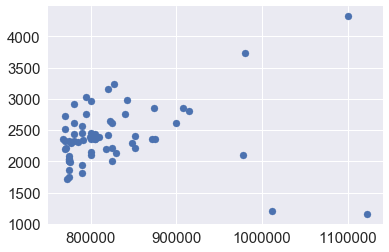

In [18]:
plt.scatter(error_df[(error_df.grade == 7)].price,error_df[(error_df.grade == 7)].sqft_living)

In the above figure, we can see those records with price higher than 950000 is likely to be the outliers. 

In [19]:
error_df[(error_df.grade == 7) & (error_df.price > 950000)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
734,1959703070,20141029T000000,9.797000e+05,5,3.00,3730,5500,1.5,0,0,3,7,2160,1570,1927,0,98102,47.6507,-122.320
1060,2473381070,20141105T000000,1.011233e+06,3,1.75,1210,7000,1.0,0,0,3,7,1210,0,1975,0,98058,47.4572,-122.169
1518,5430300120,20141113T000000,1.100000e+06,5,2.25,4320,7620,2.0,0,0,3,7,2880,1440,1973,2014,98115,47.6824,-122.287
2359,7192800145,20141202T000000,9.777699e+05,2,1.00,2100,4480,1.0,0,0,5,7,1400,700,1908,0,98126,47.5740,-122.372
5072,5272200005,20150218T000000,1.122948e+06,2,1.00,1160,6911,1.0,0,0,3,7,1160,0,1947,0,98125,47.7149,-122.318


Give them a careful view, we can notice taht these houses has extremely high price but normal size in this grade, so they are outliers and we can delete them.

In [20]:
dataset4.drop([734,1060,1518,2359,5072],inplace=True)

Check suspicious data graded `8`.

In [21]:
error_df[(error_df.grade == 8)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
663,7011201325,20141028T000000,1.010000e+06,4,2.75,2940,5400,1.5,0,2,5,8,1940,1000,1910,0,98119,47.6366,-122.369
760,269000240,20141030T000000,1.050000e+06,5,2.25,2960,7680,1.0,0,2,5,8,1550,1410,1958,0,98199,47.6456,-122.389
1125,5191100180,20141106T000000,1.005000e+06,5,2.00,2440,3080,2.0,0,0,4,8,2440,0,1910,0,98112,47.6242,-122.306
1272,8712100435,20141110T000000,1.197000e+06,4,2.50,3940,4407,2.0,0,0,4,8,2620,1320,1921,0,98112,47.6374,-122.299
1297,2581900235,20141110T000000,1.075000e+06,4,2.75,2580,8100,2.0,0,1,4,8,1780,800,1964,0,98040,47.5387,-122.215
1550,8562900240,20141114T000000,1.015000e+06,3,3.50,2880,11340,1.0,0,0,3,8,1690,1190,1980,2013,98074,47.6113,-122.058
1784,2322029048,20141119T000000,9.990000e+05,3,2.75,2830,505166,1.0,1,3,4,8,1830,1000,1962,0,98070,47.3782,-122.514
2477,5451200110,20141204T000000,1.075000e+06,4,2.50,3000,10920,1.0,0,0,4,8,1550,1450,1969,0,98040,47.5347,-122.227
2638,5460900120,20141208T000000,9.899000e+05,5,2.25,3320,11350,1.0,0,0,5,8,1660,1660,1963,0,98040,47.5749,-122.213
2776,5700003221,20141210T000000,1.075000e+06,4,2.75,2990,7389,1.5,0,0,4,8,2090,900,1923,0,98144,47.5711,-122.284


There are mamny records graded 8 is likely to be outliers and we can use scatter plot to find the data located very far from the majority.

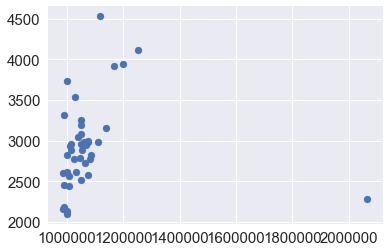

In [22]:
plt.scatter(error_df[(error_df.grade == 8)].price,error_df[(error_df.grade == 8)].sqft_living)

In [64]:
# import math
# log_price = log_price.apply(lambda x : math.log(x))
# log_sqft = log_sqft.apply(lambda x : math.log(x))

In [63]:
# plt.scatter(log_price,log_sqft)

In [23]:
error_df[(error_df.grade == 8)&(error_df.price> 1400000)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
8869,8943600430,20150423T000000,2.066243e+06,3,2.5,2283,3996,2.0,0,0,3,8,2283,0,2008,0,98031,47.4221,-122.192


Normal interior living space and land space but extremely high price, so it is outlier.

Check suspicious data graded `9`.

In [24]:
error_df[(error_df.grade == 9)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
586,7933250050,20141028T000000,1.419000e+06,5,3.25,4020,4500,2.0,0,0,3,9,3120,900,2010,0,98004,47.6349,-122.204
747,4083306045,20141029T000000,1.375000e+06,5,3.75,3330,5042,2.0,0,2,3,9,2470,860,2014,0,98103,47.6497,-122.339
1329,7582700100,20141111T000000,1.324050e+06,3,3.25,3440,4080,2.0,0,0,3,9,2560,880,2005,0,98105,47.6644,-122.280
1423,9103000715,20141112T000000,1.350000e+06,4,3.50,3600,5217,2.0,0,0,3,9,2720,880,1947,2014,98112,47.6189,-122.286
1584,8924600020,20141114T000000,1.535000e+06,4,4.50,5770,10050,1.0,0,3,5,9,3160,2610,1949,0,98115,47.6770,-122.275
1669,9550202140,20141117T000000,1.311000e+06,4,3.75,3490,5625,2.0,0,0,3,9,2610,880,2014,0,98103,47.6685,-122.332
2117,3459600440,20141125T000000,1.310000e+06,5,3.00,3650,16600,1.0,0,3,4,9,1860,1790,1978,0,98006,47.5600,-122.144
2172,4141800215,20141126T000000,1.495000e+06,4,3.75,3770,4000,2.5,0,0,5,9,2890,880,1916,0,98122,47.6157,-122.287
2549,2524049018,20141205T000000,1.406888e+06,5,2.25,3580,16789,2.0,0,0,5,9,3580,0,1966,0,98040,47.5364,-122.239
2838,328000160,20141211T000000,1.400000e+06,5,3.75,3700,7920,3.0,0,4,3,9,2900,800,1983,0,98115,47.6865,-122.266


There are mamny records graded 9 is likely to be outliers and we can use scatter plot to find the data located very far from the majority.

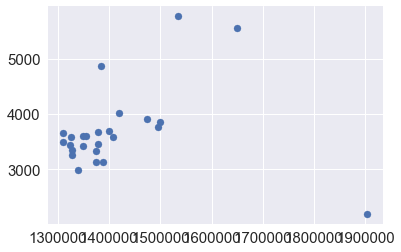

In [25]:
plt.scatter(error_df[(error_df.grade == 9)].price,error_df[(error_df.grade == 9)].sqft_living)

In [26]:
error_df[(error_df.grade == 9)& (error_df.price > 1700000)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
3777,9808630120,20150108T000000,1.903987e+06,3,2.5,2190,2658,2.0,0,3,4,9,2190,0,1979,0,98033,47.6528,-122.203


Relatively smaller space but extremely high price, outliers

In [27]:
dataset4.drop([3777],inplace=True)

Obviously far from other points, so they are outliers

In [28]:
error_df[(error_df.grade == 9)& (error_df.sqft_living > 4500)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
1584,8924600020,20141114T000000,1535000.0,4,4.50,5770,10050,1.0,0,3,5,9,3160,2610,1949,0,98115,47.6770,-122.275
7963,2625069070,20150410T000000,1385000.0,4,3.25,4860,181319,2.5,0,0,3,9,4860,0,1993,0,98074,47.6179,-122.005
9463,3024059057,20150501T000000,1650000.0,4,4.50,5550,16065,2.0,0,0,3,9,3880,1670,2003,0,98040,47.5455,-122.214


In [29]:
dataset4.drop([1584,7963,9463],inplace=True)

Check suspicious data graded `10`.

In [30]:
error_df[(error_df.grade == 10)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
82,1561600056,20141017T000000,1735000.0,4,3.50,4010,9654,2.0,0,0,3,10,4010,0,2007,0,98004,47.5891,-122.200
1174,1959701745,20141107T000000,1675000.0,6,2.25,4910,6600,2.5,0,0,5,10,3580,1330,1910,0,98102,47.6458,-122.320
1867,5021900140,20141120T000000,1679000.0,5,4.25,4830,11466,2.0,0,0,3,10,3720,1110,2014,0,98040,47.5774,-122.222
2188,4094800260,20141126T000000,1730000.0,4,3.50,4440,20668,2.0,0,2,5,10,3240,1200,1965,0,98040,47.5472,-122.235
2414,1024049024,20141203T000000,1735000.0,5,3.50,4870,7700,2.5,0,3,5,10,3650,1220,1929,0,98144,47.5832,-122.290
3821,9413900035,20150109T000000,1650000.0,4,3.25,3910,7500,2.0,0,0,3,10,3910,0,2006,0,98033,47.6527,-122.198
4514,715010130,20150202T000000,1750000.0,6,4.25,5860,13928,2.0,0,3,3,10,4150,1710,2013,0,98006,47.5382,-122.114
4737,1370800700,20150209T000000,1695000.0,3,4.00,3910,5350,2.0,0,2,5,10,2610,1300,1933,0,98199,47.6393,-122.408
4824,7856400240,20150211T000000,1650000.0,4,3.00,3900,9750,1.0,0,4,5,10,2520,1380,1972,0,98006,47.5605,-122.158
5524,3893100462,20150225T000000,1789950.0,5,3.75,4360,8504,2.0,0,4,3,10,3530,830,2014,0,98033,47.6936,-122.190


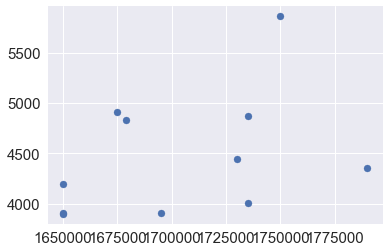

In [31]:
plt.scatter(error_df[(error_df.grade == 10)].price,error_df[(error_df.grade == 10)].sqft_living)

Located very scatteredly, all of them is likely to be outliers, so just delete them.

In [32]:
dataset4.drop([82,1174,1867,2188,2414,3821,4514,4737,4824,5524,7418],inplace=True)

Check suspicious data graded `11`.

In [33]:
error_df[(error_df.grade == 11)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
3784,824059305,20150108T000000,2200000.0,5,4.0,5840,11652,2.0,0,1,3,11,4410,1430,1988,0,98004,47.5835,-122.202


In [34]:
dataset4.drop([3784],inplace=True)

Check suspicious data graded `12`.

In [35]:
error_df[(error_df.grade == 12)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
4200,2524069078,20150122T000000,2700000.0,4,4.0,7850,89651,2.0,0,0,3,12,7850,0,2006,0,98027,47.5406,-121.982
5197,2424059170,20150219T000000,900000.0,5,6.0,7120,40806,2.0,0,4,3,12,5480,1640,2007,0,98006,47.5451,-122.114


One house's price is extremely high will another is extremely low. Both of them are outliers.

In [36]:
dataset4.drop([4200,5197],inplace=True)

Check suspicious data graded `13`.

In [37]:
error_df[(error_df.grade == 13)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long


** Check the `bedrooms` **

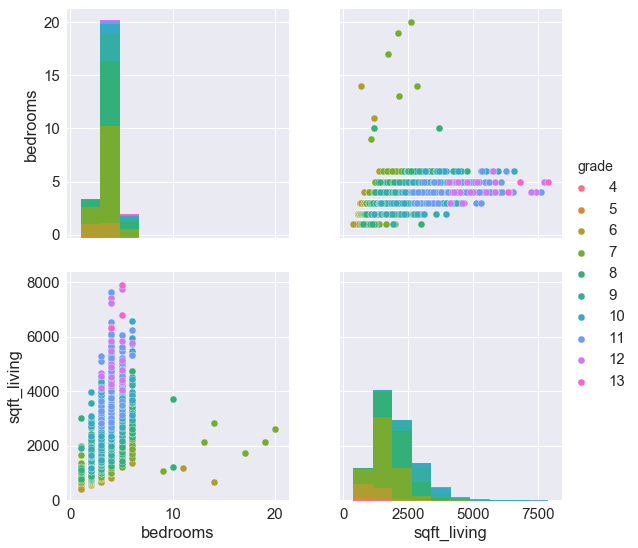

In [38]:
sns.pairplot(dataset4, vars=["bedrooms", "sqft_living"],hue="grade",size = 4)    
plt.show() 

From above figures, we can see there indeed exist some abnormal point, for example, some house have more than 10 bedrooms. However, we can not say they must be the outlier, because if this house is used for renting or accommodation, this situation will be reasonable.
As a result, we need to make further efforts to see if they are outlier.

In [39]:
dataset4[dataset4.bedrooms > 7]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
161,1214000050,20141020T000000,350000.0,13,1.75,2130,7500,1.0,0,0,4,7,1090,1040,1956,0,98166,47.4593,-122.343
457,1951800580,20141024T000000,590000.0,10,2.50,3700,12500,1.0,0,0,5,8,1920,1780,1973,0,98006,47.5403,-122.168
2019,3644100073,20141122T000000,245000.0,14,1.00,670,1675,1.0,0,0,5,6,670,0,1960,0,98144,47.5918,-122.295
2610,2919200280,20141208T000000,720168.0,19,2.25,2120,3794,2.0,0,0,4,7,1420,700,1926,0,98117,47.6893,-122.359
2880,7738500475,20141212T000000,485000.0,14,3.25,2820,6611,1.0,0,0,3,7,1410,1410,1958,0,98155,47.7473,-122.285
4846,3211101010,20150211T000000,319500.0,11,1.00,1190,8450,1.0,0,0,5,6,1190,0,1961,0,98059,47.4807,-122.157
7290,8682291840,20150331T000000,408000.0,10,2.00,1200,3900,1.0,0,0,3,8,1200,0,2006,0,98053,47.7200,-122.024
8004,9441300030,20150410T000000,615000.0,20,1.75,2620,8280,1.0,0,0,4,7,1330,1290,1948,0,98177,47.7235,-122.359
9655,739820050,20150505T000000,250000.0,17,2.50,1730,7200,2.0,0,0,4,7,1730,0,1985,0,98031,47.4029,-122.196
9774,3438500168,20150507T000000,325000.0,9,1.50,1060,7488,1.0,0,0,5,7,1060,0,1977,0,98106,47.5549,-122.356


The records above have the bedrooms number exclude normal range, hence the other columns such as bathrooms and living space is in lowerly normal range , so these records can be looked as outliers.

In [40]:
dataset4.drop([161,457,2019,2610,2880,4846,7290,8004,9655,9774],inplace=True)

**Check the `bathrooms`**

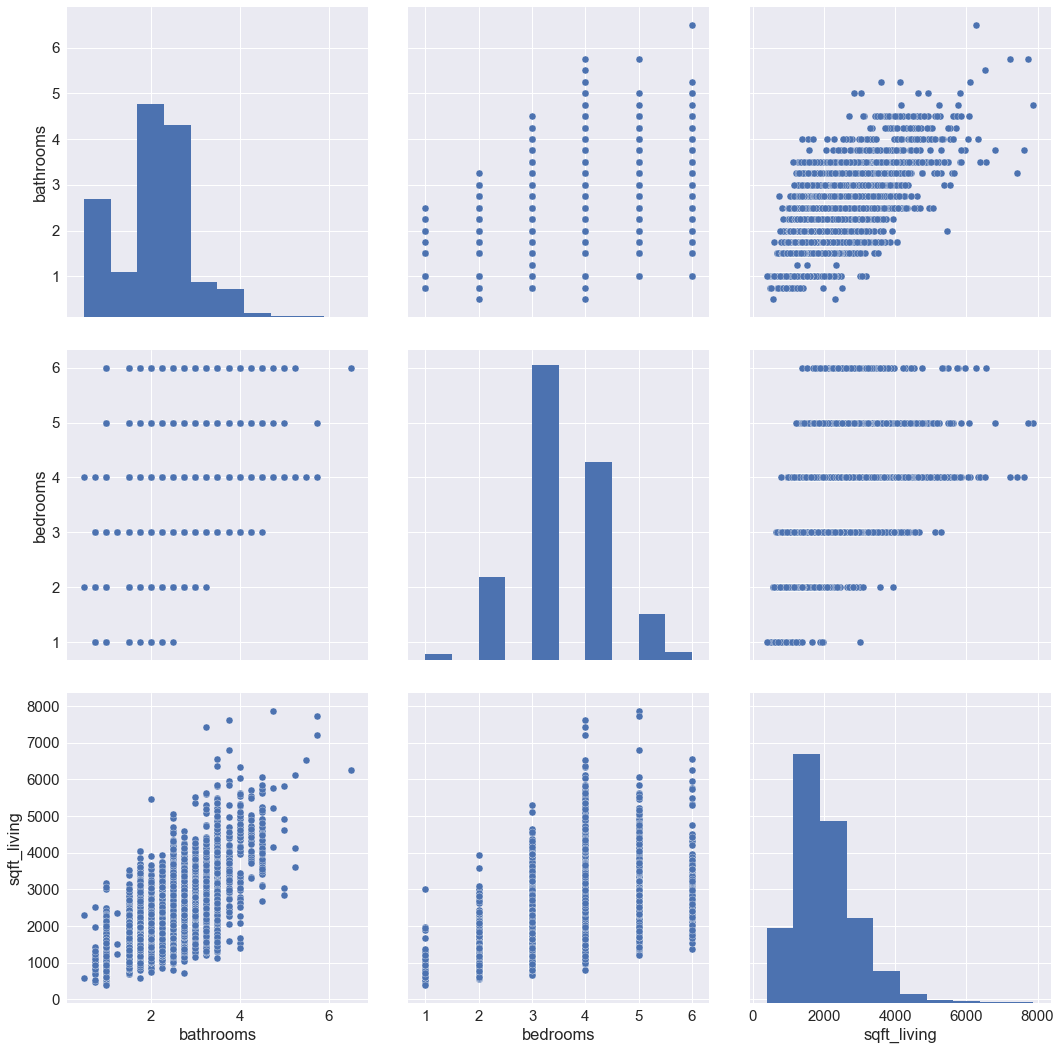

In [41]:
sns.pairplot(dataset4, vars=["bathrooms", "bedrooms",'sqft_living'],size = 5)    
plt.show()

In [42]:
dataset4[(dataset4['bathrooms'] >= 4.5)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
527,8089510170,20141027T000000,935000.0,5,4.50,4230,9701,2.0,0,0,3,10,4230,0,1999,0,98006,47.5444,-122.131
1248,7237500390,20141110T000000,1570000.0,5,4.50,6070,14731,2.0,0,0,3,11,6070,0,2004,0,98059,47.5306,-122.134
1537,5317100294,20141113T000000,1333000.0,4,4.50,3130,5126,3.0,0,0,3,10,2450,680,2014,0,98112,47.6239,-122.290
1606,7853280370,20141114T000000,805000.0,5,4.50,4600,7810,2.0,0,0,3,9,3200,1400,2006,0,98065,47.5381,-121.860
1623,7237500590,20141117T000000,1320000.0,4,5.25,6110,10369,2.0,0,0,3,11,6110,0,2005,0,98059,47.5285,-122.135
1719,9297300740,20141118T000000,643500.0,6,5.25,3600,3960,2.0,0,0,3,7,2400,1200,1971,0,98126,47.5656,-122.372
1727,226059096,20141118T000000,1565000.0,5,4.50,5220,67319,2.0,0,0,3,11,5220,0,2001,0,98072,47.7666,-122.128
1989,1725059136,20141121T000000,1815000.0,4,4.50,4510,12873,2.0,0,2,3,12,4510,0,1998,0,98033,47.6491,-122.201
2116,8901000143,20141125T000000,500000.0,4,4.50,2690,7350,1.5,0,0,5,7,2690,0,1949,0,98125,47.7062,-122.311
2655,3226069049,20141208T000000,1237500.0,4,4.50,5120,41327,2.0,0,0,3,10,3290,1830,2008,0,98053,47.7009,-122.059


Even though there are some abnormal points from the `bathrooms` versus `sqft_living` figures,
I still decided to keep these values, since if they are something like appartments or student studio, limited space and near 1:1 bedroom-bathroom ratio is possible. 

### 3. Check unreasonable data before detecting Outlier
It is a common sense that the sqft_above per floor should be smaller than the sqft_lot, so just check whether there is any unreasonable data not correspond with it.

In [43]:
#Check the validity of bathrooms column
dataset4[dataset4['bathrooms']%0.25 != 0]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long


In [44]:
dataset4.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
count,9.959000e+03,9.959000e+03,9959.000000,9959.000000,9959.000000,9.959000e+03,9959.000000,9959.000000,9959.000000,9959.000000,9959.000000,9959.000000,9959.000000,9959.000000,9959.000000,9959.000000,9959.000000,9959.000000
mean,4.600665e+09,4.955677e+05,3.345015,2.080078,2019.889447,1.545040e+04,1.486997,0.002410,0.192489,3.372628,7.590119,1747.580681,272.308766,1972.071192,67.895271,98078.479867,47.555118,-122.212562
std,2.879772e+09,2.483261e+05,0.869268,0.732884,844.822448,4.296863e+04,0.540726,0.049034,0.674619,0.622128,1.108172,787.794350,416.182341,28.834961,361.711761,53.440657,0.142395,0.140901
min,1.000102e+06,8.995000e+04,1.000000,0.500000,390.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,4.000000,390.000000,0.000000,1900.000000,0.000000,98001.000000,47.162200,-122.519000
25%,2.126059e+09,3.200000e+05,3.000000,1.500000,1400.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1180.000000,0.000000,1953.000000,0.000000,98033.000000,47.456300,-122.329000
50%,3.905090e+09,4.390000e+05,3.000000,2.250000,1860.000000,7.508000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1530.000000,0.000000,1976.000000,0.000000,98065.000000,47.563400,-122.228000
75%,7.374400e+09,6.075000e+05,4.000000,2.500000,2480.000000,1.036000e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2158.000000,520.000000,1998.000000,0.000000,98118.000000,47.679900,-122.122000
max,9.900000e+09,2.479000e+06,6.000000,6.500000,7880.000000,1.164794e+06,3.500000,1.000000,4.000000,5.000000,13.000000,7880.000000,2580.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000


Calculating the average sqft_above per floor compare with sqft_lot

In [45]:
# must be outlier
dataset4[(dataset4.sqft_above/dataset4.floors) > dataset4.sqft_lot]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
322,9828702895,20141022T000000,700000.0,4,1.75,2420,520,1.5,0,0,3,7,2420,0,1900,0,98112,47.6209,-122.302


We can get one record, and just delete it.

In [46]:
dataset4.drop([322],inplace=True)

According to description, sqft_living should be equal to the sum of sqft_basement and sqft_above, so we need to check if incorrect data exist.

In [47]:
#Check the validity of sqft_living column
dataset4[dataset4['sqft_living'] != (dataset4['sqft_above']+ dataset4['sqft_basement'])]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long


No incorrect data, just continue.

In [48]:
dataset4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9958 entries, 0 to 9995
Data columns (total 19 columns):
id               9958 non-null int64
date             9958 non-null object
price            9958 non-null float64
bedrooms         9958 non-null int64
bathrooms        9958 non-null float64
sqft_living      9958 non-null int64
sqft_lot         9958 non-null int64
floors           9958 non-null float64
waterfront       9958 non-null int64
view             9958 non-null int64
condition        9958 non-null int64
grade            9958 non-null int64
sqft_above       9958 non-null int64
sqft_basement    9958 non-null int64
yr_built         9958 non-null int64
yr_renovated     9958 non-null int64
zipcode          9958 non-null int64
lat              9958 non-null float64
long             9958 non-null float64
dtypes: float64(5), int64(13), object(1)
memory usage: 1.5+ MB


### 4. Save the dataset into CSV file

In [49]:
dataset4.to_csv('dataset4_solution.csv', encoding = 'utf-8', index = False)

### 5. Reference

- seaborn. Retrieved from: https://seaborn.pydata.org/
- matplotlib. Retrieved from: https://matplotlib.org/
- Interquartile range. Retrieved from: https://en.wikipedia.org/wiki/Interquartile_range
- IQR rules for outlier. Retrieved from: http://www.purplemath.com/modules/boxwhisk3.htm
- *Mining Imperfect Data* ,Chapter 3 Univariate Outlier Detection.  Retrieved from: https://epubs.siam.org/doi/abs/10.1137/1.9780898717884.ch3
- *Mining Imperfect Data*,Chapter 2 Imperfect Datasets: Character, Consequences,and Causes Retrieved from: https://epubs.siam.org/doi/abs/10.1137/1.9780898717884.ch2